# HOUSING: PRICE PREDICTION

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

In [1]:
# Importing basic library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
# from xgboost import XGBRFRegressor

# Metrics to evaluate the model
from sklearn.metrics import mean_squared_error as mse
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 25)
# disallowing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [4]:
test=pd.read_csv('test.csv')

In [5]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [6]:
print(test.shape)
print(train.shape)

(292, 80)
(1168, 81)


In [7]:
train[train['BsmtFinSF1'] == 0][['BsmtFinSF1','BsmtFinSF2']]

,BsmtFinSF1,BsmtFinSF2
5,0,0
10,0,0
12,0,0
13,0,0
14,0,0
...,...,...
1153,0,0
1156,0,0
1157,0,0
1164,0,0


In [8]:
for i in [train,test]:
    (i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# EDA

In [9]:
train[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,120,0,958,1078
1,351,823,1043,2217
2,862,0,255,1117
3,705,0,1139,1844
4,1246,0,356,1602
...,...,...,...,...
1163,450,0,432,882
1164,0,0,0,0
1165,566,0,289,855
1166,0,0,649,649


In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,275.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,46.157534,557.315068,1042.767123,1133.691781,339.657534,3.702055,1477.051370,0.424658,0.065068,1.575342,0.359589,2.794521,1.05137,6.417808,0.595890,1979.760000,1.729452,457.458904,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,152.467119,411.043768,424.561153,366.941919,424.278825,38.219527,514.199429,0.508831,0.247070,0.547856,0.494795,0.807336,0.23616,1.728105,0.621259,23.868875,0.754430,210.785591,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,0.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,255.000000,771.750000,858.000000,0.000000,0.000000,1061.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1964.000000,1.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,0.000000,487.000000,971.000000,1047.500000,0.000000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1979.000000,2.000000,467.500000,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,0.000000,780.000000,1322.000000,1370.500000,717.000000,0.000000,1720.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2003.000000,2.000000,569.750000,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,1085.000000,1935.000000,3094.000000,2402.000000,1589.000000,479.000000,3447.000000,2.000000,1.000000,3.000000,2.000000,6.000000,3.00000,12.000000,2.000000,2010.000000,4.000000,1052.000000,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [12]:
train['MoSold'].value_counts()

6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64

In [13]:
test['MoSold'].value_counts()

6     50
7     47
5     38
4     28
8     27
10    23
3     19
2     15
1     14
12    13
11    12
9      6
Name: MoSold, dtype: int64

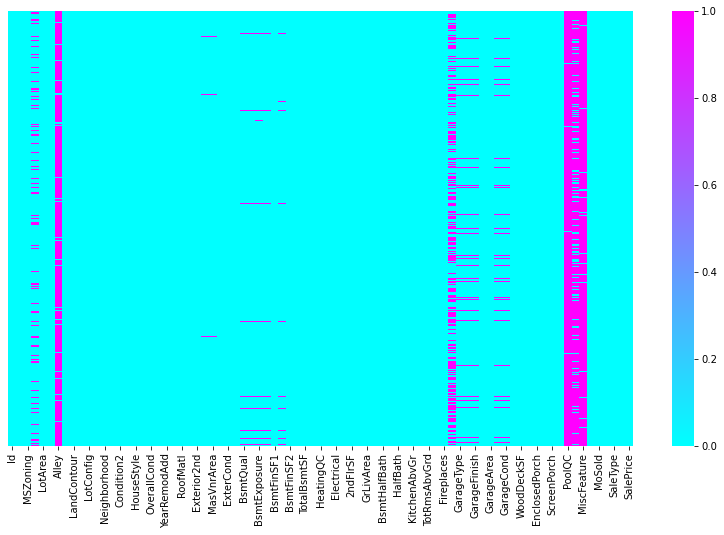

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(train.isnull(), yticklabels=False, cmap='cool')
plt.show()

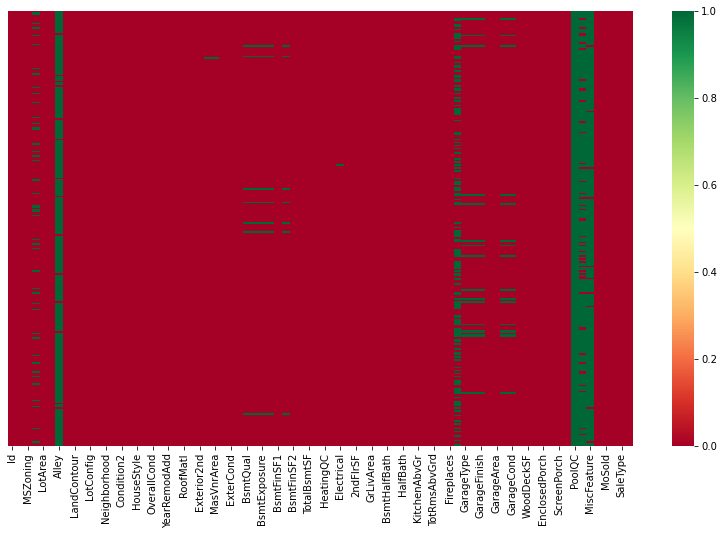

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(test.isnull(), yticklabels=False, cmap='RdYlGn')
plt.show()

In [16]:
# Storing null values in train,then printing columns with more than 0 null values
null=train.isnull().sum().sort_values(ascending=False)
null[null>0]

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
dtype: int64

In [17]:
# Percentage of missing values in train data
total_rows=1460
miss_per=pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/total_rows)*100).round(2)
miss_per

,Missing,Missing%
PoolQC,1161,79.52
MiscFeature,1124,76.99
Alley,1091,74.73
Fence,931,63.77
FireplaceQu,551,37.74
LotFrontage,214,14.66
GarageYrBlt,64,4.38
GarageFinish,64,4.38
GarageType,64,4.38
GarageQual,64,4.38


In [18]:
# Percentage of missing values in Test Data
# Null values in test dataset
null2=test.isnull().sum().sort_values(ascending=False)
null2[null2>0]
total_rows=292
miss_per=pd.DataFrame(null2[null2>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/total_rows)*100).round(2)
miss_per

,Missing,Missing%
PoolQC,292,100.00
MiscFeature,282,96.58
Alley,278,95.21
Fence,248,84.93
FireplaceQu,139,47.60
LotFrontage,45,15.41
GarageType,17,5.82
GarageYrBlt,17,5.82
GarageQual,17,5.82
GarageCond,17,5.82


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

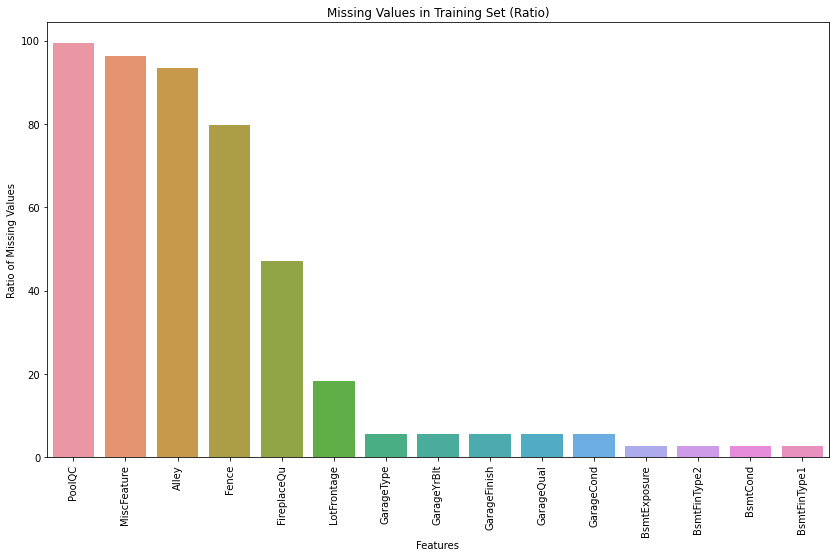

In [21]:
na_data = (train.isnull().sum()/len(train))*100
na_data = na_data.drop(na_data[na_data == 0].index).sort_values(ascending=False)[:15]
fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(x=na_data.index ,y=na_data)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Ratio of Missing Values')
plt.title('Missing Values in Training Set (Ratio)')
plt.show()

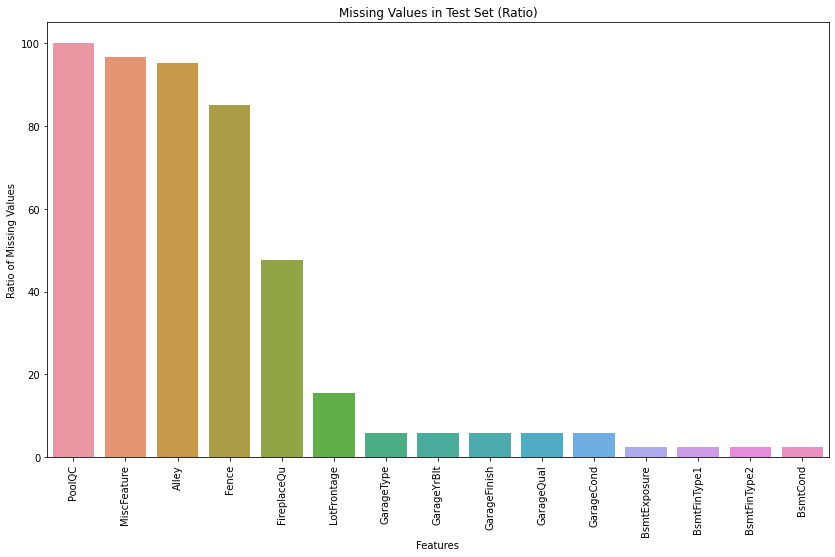

In [22]:
all_testdata_na = (test.isnull().sum()/len(test))*100
all_testdata_na = all_testdata_na.drop(all_testdata_na[all_testdata_na == 0].index).sort_values(ascending=False)[:15]
fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(x=all_testdata_na.index ,y=all_testdata_na)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Ratio of Missing Values')
plt.title('Missing Values in Test Set (Ratio)')
plt.show()

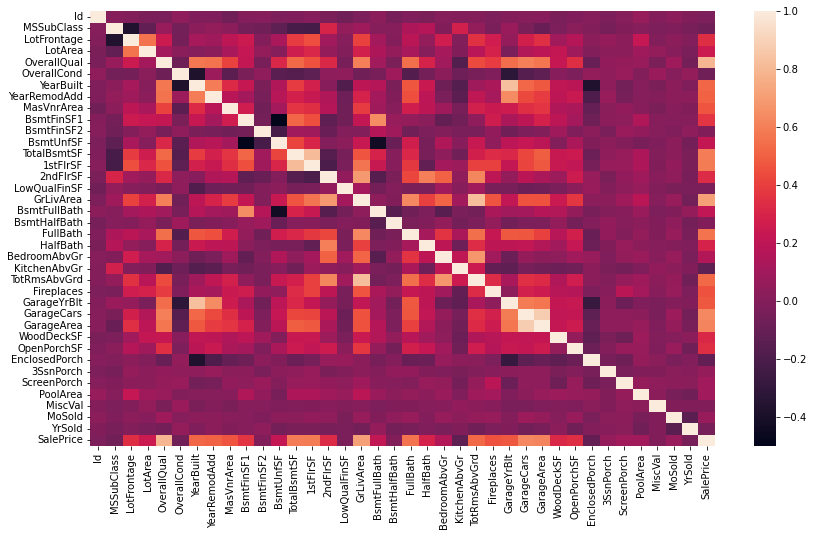

In [23]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr())
plt.show()

In [24]:
train.isnull().sum().idxmax()

'PoolQC'

In [25]:
train['PoolQC'].isnull().sum()

1161

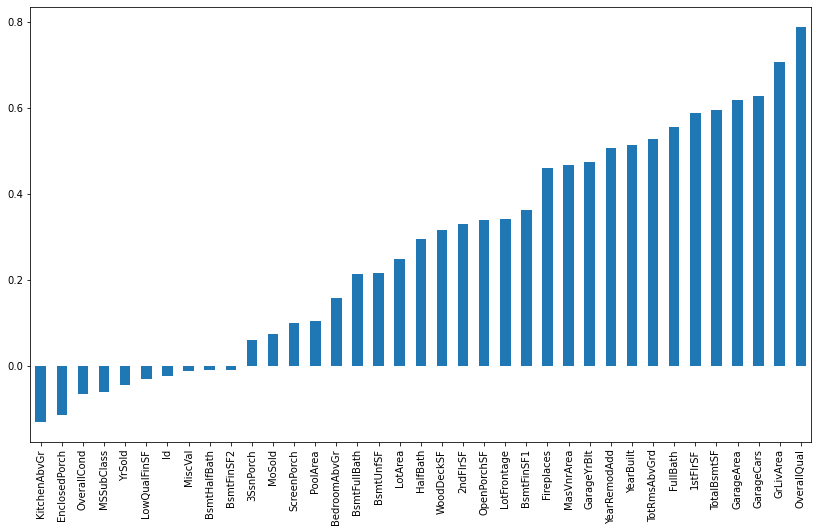

In [26]:
plt.figure(figsize=(14,8))
train.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [27]:
train.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
                   ...   
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, Length: 37, dtype: float64

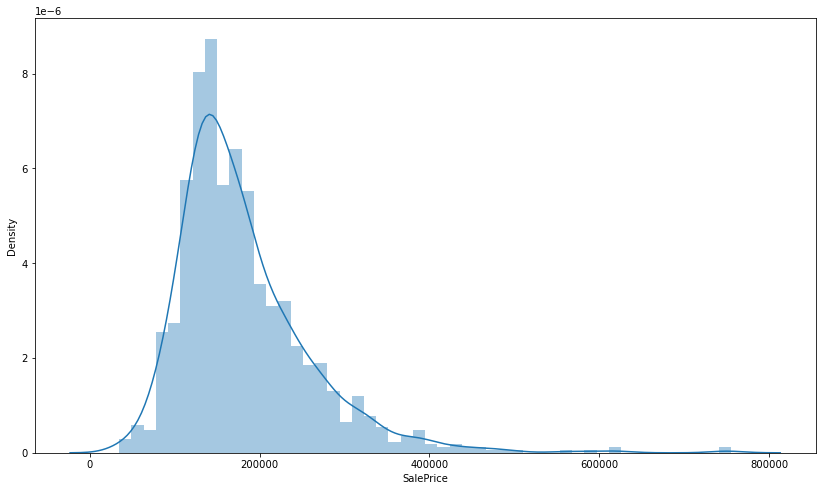

In [28]:
plt.figure(figsize=(14,8))
sns.distplot(train['SalePrice'], kde=True, bins=50)
plt.show()

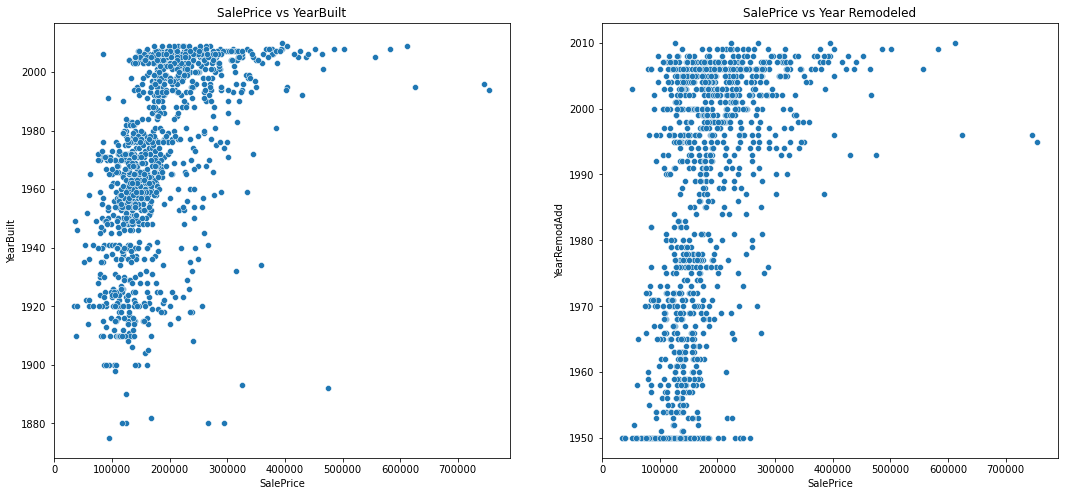

In [29]:
fig, axes = plt.subplots(1,2, figsize=(18,8))
sns.scatterplot(x = 'SalePrice', y= 'YearBuilt', data=train, ax=axes[0])
sns.scatterplot(x = 'SalePrice', y='YearRemodAdd', data=train, ax=axes[1])
axes[0].set_title('SalePrice vs YearBuilt')
axes[1].set_title('SalePrice vs Year Remodeled')
plt.show()

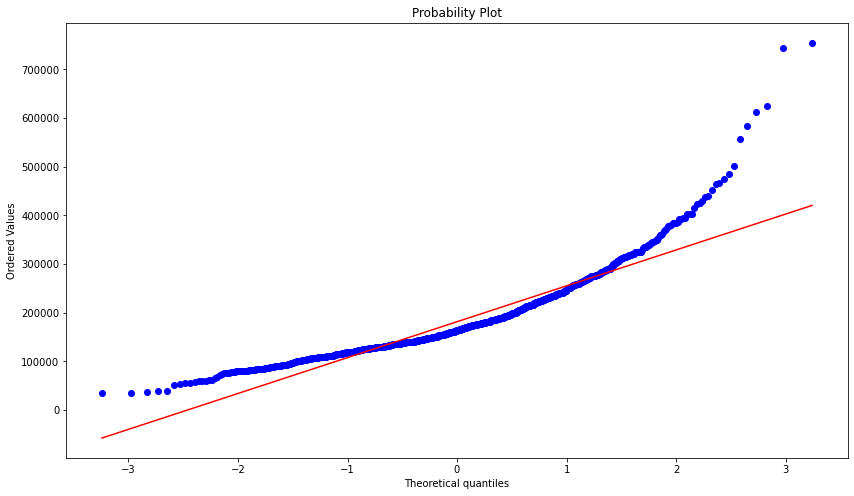

In [30]:
import scipy.stats as stats

plt.figure(figsize=(14,8))
stats.probplot(train['SalePrice'],plot=plt,dist='norm')
plt.show()

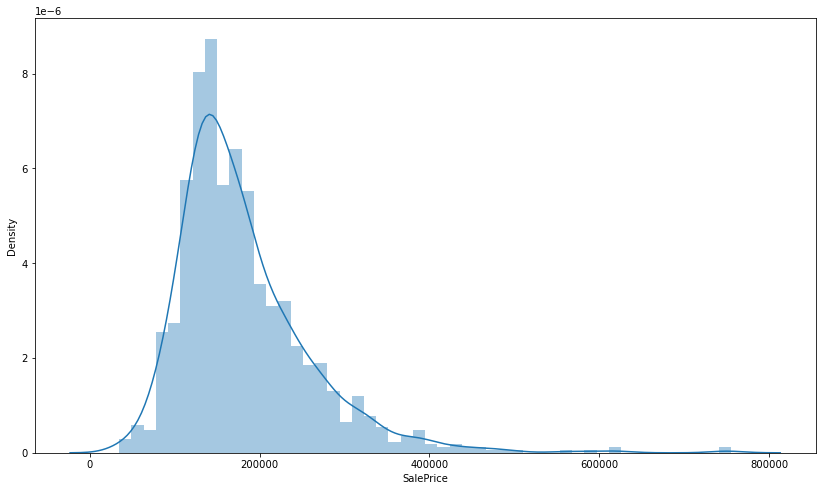

In [31]:
plt.figure(figsize=(14,8))
sns.distplot(train['SalePrice'], kde=True, bins=50)
plt.show()

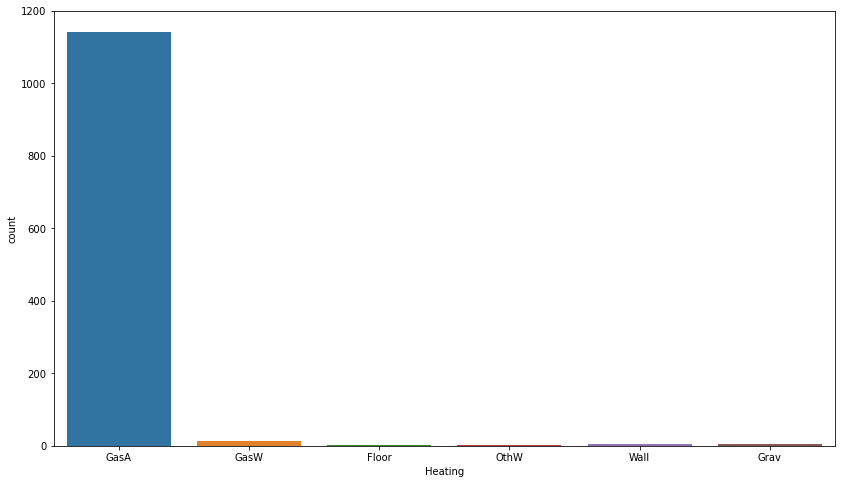

In [32]:
plt.figure(figsize=(14,8))
sns.countplot(data = train, x= train['Heating'])
plt.show()

In [33]:
train['Heating'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

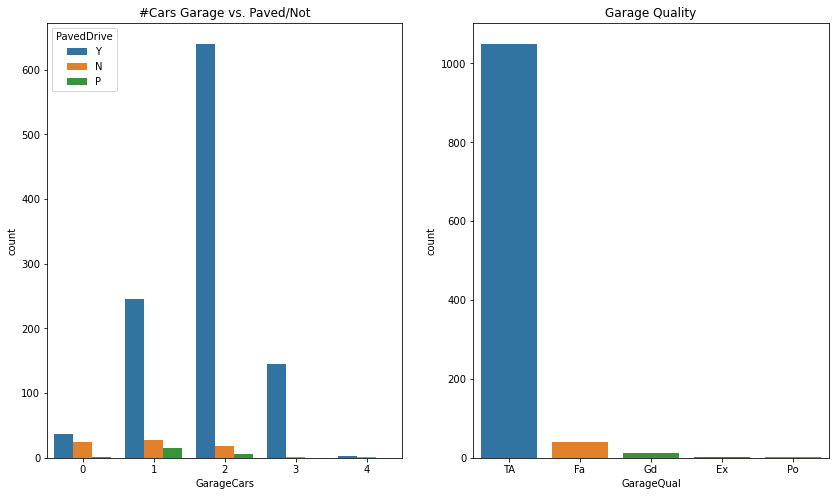

In [34]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=train,x = 'GarageCars', hue = 'PavedDrive', ax=ax[0])
sns.countplot(data = train, x = 'GarageQual', ax=ax[1])
ax[0].set_title('#Cars Garage vs. Paved/Not')
ax[1].set_title('Garage Quality')
plt.show()

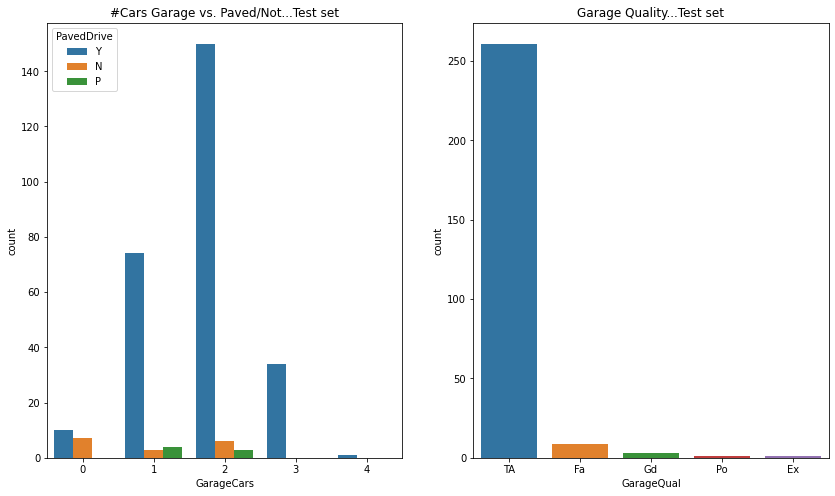

In [35]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=test,x = 'GarageCars', hue = 'PavedDrive', ax=ax[0])
sns.countplot(data = test, x = 'GarageQual', ax=ax[1])
ax[0].set_title('#Cars Garage vs. Paved/Not...Test set')
ax[1].set_title('Garage Quality...Test set')
plt.show()

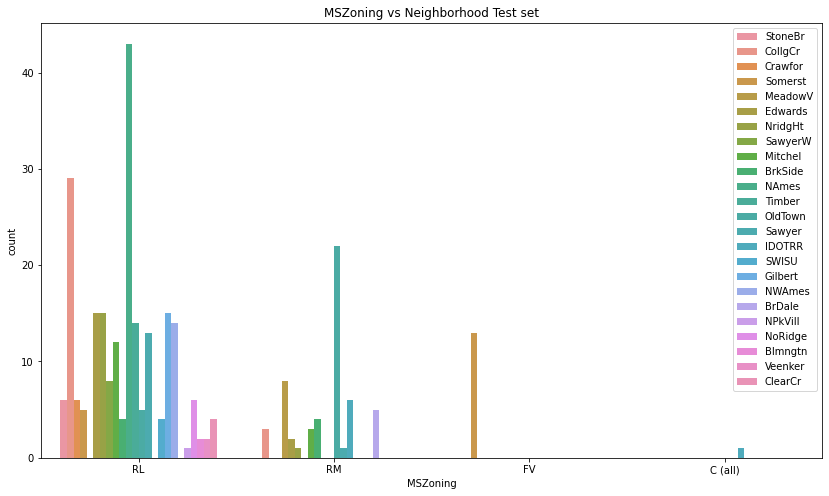

In [36]:
plt.figure(figsize=(14,8))
sns.countplot(data=test, x='MSZoning', hue = 'Neighborhood')
plt.title('MSZoning vs Neighborhood Test set')
plt.legend(loc=1)
plt.show()

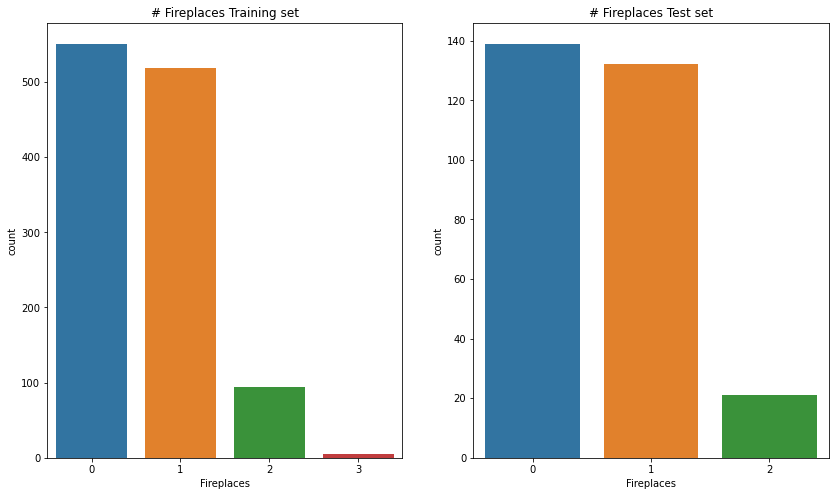

In [37]:
fig,ax = plt.subplots(1,2,figsize=(14,8))
sns.countplot(data=train, x='Fireplaces', ax=ax[0])
sns.countplot(data=test, x='Fireplaces', ax=ax[1])
ax[0].set_title('# Fireplaces Training set')
ax[1].set_title('# Fireplaces Test set')
plt.show()

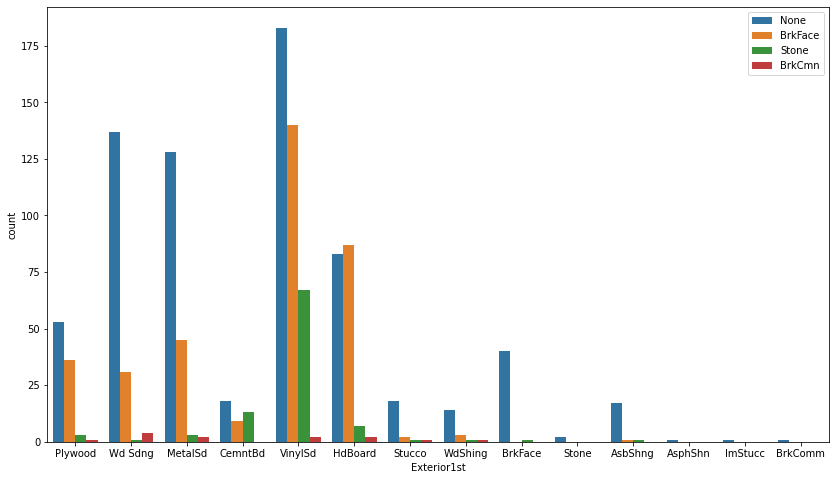

In [38]:
plt.figure(figsize=(14,8))
sns.countplot(data=train, x = 'Exterior1st', hue = 'MasVnrType')
plt.legend(loc=1)
plt.show()

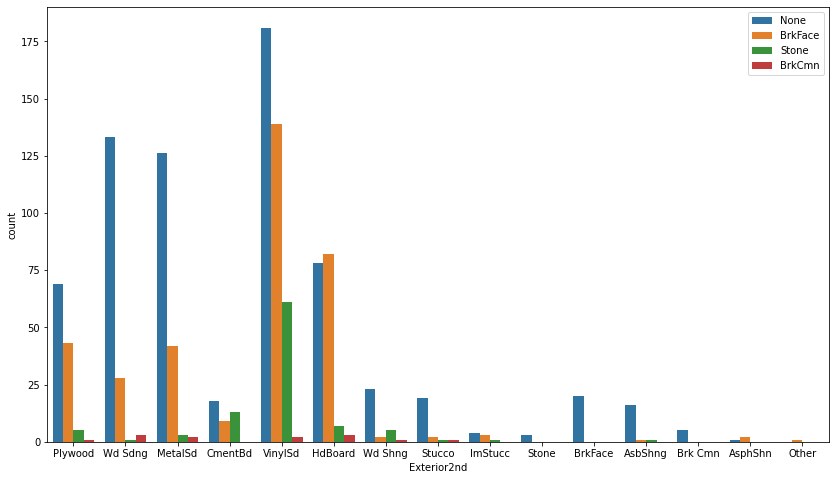

In [39]:
plt.figure(figsize=(14,8))
sns.countplot(data=train, x = 'Exterior2nd', hue = 'MasVnrType')
plt.legend(loc=1)
plt.show()

Here, it should be kept in mind that we need to drop same columns in TEST dataset, else we would face error while testing. Since it is compulsory for train and test data to have same number of features. So I am dropping same columns in TRAIN as well as in TEST data below.

In [40]:
# dropping columns which has around 50 percent missing values
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)

In [41]:
# Checking shape after dropping
train.shape,test.shape

((1168, 76), (292, 75))

In [42]:
# Checking again for null values in train and test data
null=train.isnull().sum().sort_values(ascending=False)
null[null>0]

LotFrontage     214
GarageType       64
GarageYrBlt      64
GarageFinish     64
GarageQual       64
GarageCond       64
BsmtExposure     31
BsmtFinType2     31
BsmtQual         30
BsmtCond         30
BsmtFinType1     30
MasVnrType        7
MasVnrArea        7
dtype: int64

In [43]:
null2=test.isnull().sum().sort_values(ascending=False)
null2[null2>0]

LotFrontage     45
GarageType      17
GarageYrBlt     17
GarageFinish    17
GarageQual      17
GarageCond      17
BsmtExposure     7
BsmtQual         7
BsmtFinType2     7
BsmtCond         7
BsmtFinType1     7
MasVnrType       1
Electrical       1
MasVnrArea       1
dtype: int64

We can see that there are fewer records with null values, we can simply drop them, but since we are using different data for test, there might be problem in testing. Becuase our train and test data must have same features, else we won't be able to test.

So we will deal with each column separately, to manage missing value.

Dealing with Missing values

In [44]:
# LotFrontage

train.LotFrontage.dtypes, test.LotFrontage.dtypes

(dtype('float64'), dtype('float64'))

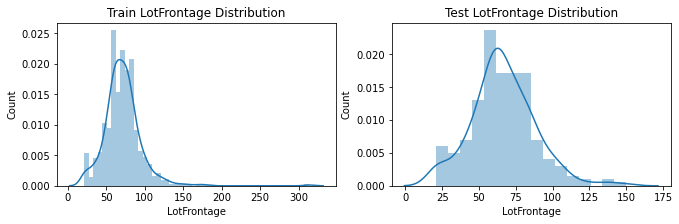

In [45]:
import seaborn as sns

plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(train['LotFrontage'])
plt.title('Train LotFrontage Distribution')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(test['LotFrontage'])
plt.title('Test LotFrontage Distribution')
plt.ylabel('Count')
plt.show()

In [46]:
train['LotFrontage'].describe()

count    954.00000
mean      70.98847
std       24.82875
min       21.00000
25%       60.00000
50%       70.00000
75%       80.00000
max      313.00000
Name: LotFrontage, dtype: float64

In [47]:
test['LotFrontage'].describe()

count    247.000000
mean      66.425101
std       21.726343
min       21.000000
25%       53.500000
50%       65.000000
75%       79.000000
max      150.000000
Name: LotFrontage, dtype: float64

From above description we can see that, mean values is 70, and 25% percent value is 59 or less than this, it means 75 percent values are greater than 59. From these 3 facts we can be sure to fill null values with mean values. Lets do this. To avoid any heavy incosistency lets take some intermediate value between 59 and 70(mean of column Lotfrontage), say 65

In [48]:
train['LotFrontage'].fillna(65,inplace=True)
test['LotFrontage'].fillna(68,inplace=True)

In [49]:
# GarageType

In [50]:
print(train['GarageType'].value_counts())
print(test['GarageType'].value_counts())

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64
Attchd     179
Detchd      73
BuiltIn     18
Basment      3
2Types       1
CarPort      1
Name: GarageType, dtype: int64


In [51]:
# It would be better to fill it with mode value or by forward fill method
train['GarageType'].fillna(method='ffill',inplace=True)
test['GarageType'].fillna(method='ffill',inplace=True)

In [52]:
# GarageCond
print(train['GarageCond'].describe())
print(test['GarageCond'].describe())

count     1104
unique       5
top         TA
freq      1061
Name: GarageCond, dtype: object
count     275
unique      5
top        TA
freq      265
Name: GarageCond, dtype: object


In both train and test data, Most frequent value is TA, count of all other values is negligible in comparison to TA, Its probably the best choice to choose to fill missing values in this GarageCond column.

In [53]:
# GarageYrBlt
# Getting missing values in 'GarageYrBlt' of train and test
train['GarageYrBlt'].isnull().sum(),  test['GarageYrBlt'].isnull().sum()

(64, 17)

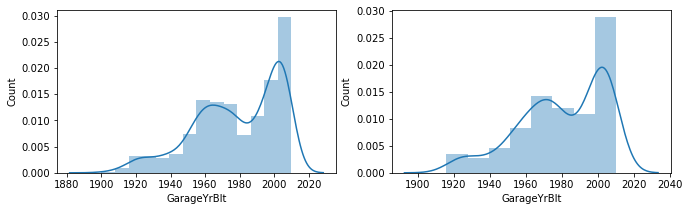

In [54]:
# Plotting univariate plot for train and test
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(train['GarageYrBlt'])
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(test['GarageYrBlt'])
plt.ylabel('Count')
plt.show()

Data is scattered vastly, it is not normally distributed we can't use mean value to fill missing records. We need to look at the data more closely.

In [55]:
print(train['GarageYrBlt'].mode())
print(test['GarageYrBlt'].mode())

0    2006.0
dtype: float64
0    2004.0
dtype: float64


2006 and 2004 is most occuring value, since this is float type column but consist of discrete values, its something difficult to fill. We can't fill with mean value, because this is not a continuous data as a result of some input function. Also data distribution is not a normal distribution. we can choose the method 'bfill' or 'ffill', but before we do that lets observe sample between different ranges of indexe to find if NaN values have some relation to other columns. For this I will first print records train dataset where GarageYrblt is NaN.

In [56]:
# Making a dataframe where all values is NaN in GarageYrBlt
nan=train[train['GarageYrBlt'].isna()]
nan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,534,20,RL,50.0,5000,Pave,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Fa,N,FuseF,334,0,0,334,0,0,1,0,1,1,Fa,2,Typ,0,Attchd,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,1,2007,WD,Normal,39300
72,126,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,Attchd,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500
74,1327,30,RH,70.0,4270,Pave,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,3,6,1931,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,544,Unf,0,0,544,GasA,Ex,Y,SBrkr,774,0,0,774,0,0,1,0,3,1,Gd,6,Typ,0,Attchd,NaN,NaN,0,0,NaN,NaN,Y,0,0,286,0,0,0,0,5,2007,WD,Normal,79000
105,141,20,RL,70.0,10500,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Attchd,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,ConLI,Normal,115000
116,149,20,RL,63.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,120.0,TA,TA,PConc,Gd,TA,No,GLQ,680,Unf,0,400,1080,GasA,Ex,Y,SBrkr,1080,0,0,1080,1,0,1,0,3,1,Gd,6,Typ,0,Attchd,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2008,WD,Normal,141000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1219,50,RM,52.0,6240,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,5,1947,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,N,SBrkr,672,240,0,912,0,0,1,0,2,1,TA,3,Typ,0,Attchd,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,7,2006,WD,Normal,80500
1139,583,90,RL,81.0,11841,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,TA,Y,SBrkr,816,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,Detchd,NaN,NaN,0,0,NaN,NaN,Y,0,32,0,0,0,0,0,5,2007,WD,Normal,118500
1145,1284,90,RL,94.0,9400,Pave,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,912,912,GasA,TA,Y,SBrkr,912,912,0,1824,0,0,2,2,4,2,TA,8,Typ,0,Attchd,NaN,NaN,0,0,NaN,NaN,Y,128,0,0,0,0,0,0,4,2010,WD,Normal,139000
1149,971,50,RL,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,4,4,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,720,720,GasA,TA,N,FuseA,720,472,0,1192,0,0,1,1,4,1,TA,6,Typ,0,Attchd,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,12,2006,WD,Abnorml,135000


In [57]:
# Chekcing which column has most correlation with GarageYrBlt column
train.corr()['GarageYrBlt'].nlargest(3)

GarageYrBlt     1.000000
YearBuilt       0.826366
YearRemodAdd    0.639153
Name: GarageYrBlt, dtype: float64

In [58]:
test.corr()['GarageYrBlt'].nlargest(3)

GarageYrBlt     1.000000
YearBuilt       0.822532
YearRemodAdd    0.656544
Name: GarageYrBlt, dtype: float64

From above two correlation codes, we can see that GarageYrBlt is mostly related to YearBuilt column, lets print these two columns separately

In [59]:
# Setting pandas to disaply all rows
pd.set_option('display.max_rows', None)

In [60]:
# Printing first 50 records of the most correlated column with GarageYrBlt
train[['GarageYrBlt','YearBuilt']][0:50]

,GarageYrBlt,YearBuilt
0,1977.0,1976
1,1970.0,1970
2,1997.0,1996
3,1977.0,1977
4,1977.0,1977
5,2006.0,2006
6,1957.0,1957
7,1957.0,1957
8,1965.0,1965
9,1947.0,1947


In [61]:
test[['GarageYrBlt','YearBuilt']][50:100]

,GarageYrBlt,YearBuilt
50,1977.0,1941
51,1977.0,1977
52,1979.0,1939
53,1926.0,1926
54,1996.0,1996
55,1965.0,1965
56,1930.0,1930
57,2003.0,2003
58,1963.0,1963
59,2006.0,2006


Now, from above two outputs we can see that these columns are exactly same, we can either delete one of these column and or can use YearBuilt to fill GarageYrBlt, lets delete GarageYrBuilt as it contain 81 null values

In [62]:
train.drop('GarageYrBlt',axis=1,inplace=True)
# repeat the same operation on test data
test.drop('GarageYrBlt',axis=1,inplace=True)

In [63]:
# GarageCond
print(train['GarageCond'].describe())
print(test['GarageCond'].describe())

count     1104
unique       5
top         TA
freq      1061
Name: GarageCond, dtype: object
count     275
unique      5
top        TA
freq      265
Name: GarageCond, dtype: object


In [64]:
print(train['GarageCond'].value_counts(ascending=False))
print(test['GarageCond'].value_counts(ascending=False))

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64
TA    265
Fa      7
Po      1
Ex      1
Gd      1
Name: GarageCond, dtype: int64


'TA' is most occuring value in both train and test data,its good to use to fill missing values in both datasets

In [65]:
train['GarageCond'].fillna('TA',inplace=True)
test['GarageCond'].fillna('TA',inplace=True)

In [66]:
# GarageFinish
print(train['GarageFinish'].value_counts(ascending=False))
print(test['GarageFinish'].value_counts(ascending=False))

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64
Unf    118
RFn     83
Fin     74
Name: GarageFinish, dtype: int64


In [67]:
train['GarageFinish'].isnull().sum(), test['GarageFinish'].isnull().sum()

(64, 17)

In [68]:
# Filling 51 values with 'Unf' and 30 values using 'RFn'
train['GarageFinish'].fillna('Unf',limit=51,inplace=True)
train['GarageFinish'].fillna('Rfn',limit=30,inplace=True)

In [69]:
test['GarageFinish'].fillna('Unf',limit=50,inplace=True)
test['GarageFinish'].fillna('RFn',limit=38,inplace=True)

In [70]:
# GarageQual
print(train['GarageQual'].describe())
print(test['GarageQual'].describe())

count     1104
unique       5
top         TA
freq      1050
Name: GarageQual, dtype: object
count     275
unique      5
top        TA
freq      261
Name: GarageQual, dtype: object


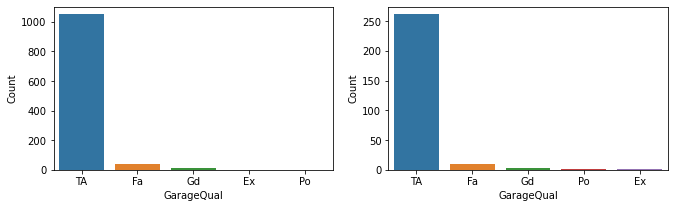

In [71]:
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.countplot(train['GarageQual'])
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(test['GarageQual'])
plt.ylabel('Count')
plt.show()

We will use TA to fill missing value as it has appeared 1311 times of of total 1379 records in train data, and for test data in has occured 1293 times

In [72]:
train['GarageQual'].fillna('TA',inplace=True)
test['GarageQual'].fillna('TA',inplace=True)

In [73]:
# BsmtFinType2
print(train['BsmtFinType2'].describe())
print(test['BsmtFinType2'].describe())

count     1137
unique       6
top        Unf
freq      1002
Name: BsmtFinType2, dtype: object
count     285
unique      6
top       Unf
freq      254
Name: BsmtFinType2, dtype: object


In [74]:
train['BsmtFinType2'].fillna('Unf',inplace=True)
test['BsmtFinType2'].fillna('Unf',inplace=True)

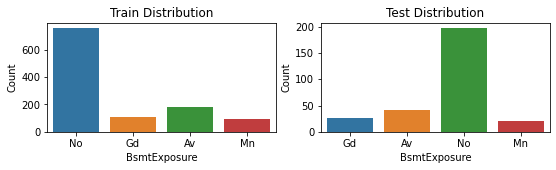

In [75]:
# BsmtExposure
plt.figure(figsize=(9,2))
plt.subplot(1,2,1)
sns.countplot(train['BsmtExposure'])
plt.title('Train Distribution')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.countplot(test['BsmtExposure'])
plt.title('Test Distribution')
plt.ylabel('Count')
plt.show()

In [76]:
# Number of missing values in train and test 
train['BsmtExposure'].isnull().sum(), test['BsmtExposure'].isnull().sum()

(31, 7)

In [77]:
# Filling with most frequent value 'No'
train['BsmtExposure'].fillna('No',inplace=True)
test['BsmtExposure'].fillna('No',inplace=True)

In [78]:
# BsmtFinType1
train['BsmtFinType1'].isnull().sum(),   test['BsmtFinType1'].isnull().sum()

(30, 7)

In [79]:
train['BsmtFinType1'].fillna('GLQ',limit=19,inplace=True)
train['BsmtFinType1'].fillna('Unf',limit=18,inplace=True)

In [80]:
test['BsmtFinType1'].fillna('GLQ',limit=22,inplace=True)
test['BsmtFinType1'].fillna('Unf',limit=20,inplace=True)

In [81]:
# BsmtCond
print(train['BsmtCond'].value_counts())
print(test['BsmtCond'].value_counts())

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64
TA    270
Gd      9
Fa      6
Name: BsmtCond, dtype: int64


'TA' has most number of occurace, we will use this value to fill missed records

In [82]:
train['BsmtCond'].fillna('TA',inplace=True)
test['BsmtCond'].fillna('TA',inplace=True)

In [83]:
# BsmtQual
train['BsmtQual'].isnull().sum(), test['BsmtQual'].isnull().sum()

(30, 7)

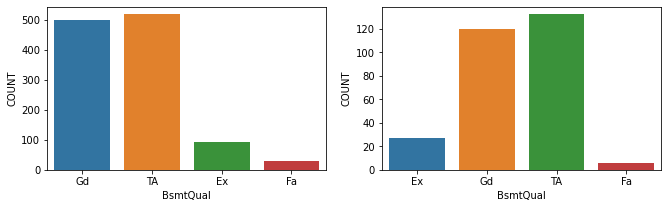

In [84]:
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.countplot(train['BsmtQual'])
plt.ylabel('COUNT')

plt.subplot(1,2,2)
sns.countplot(test['BsmtQual'])
plt.ylabel('COUNT')
plt.show()

We will use 'Gd'and 'TA' almost equally to fill missed records

In [85]:
train['BsmtQual'].fillna('TA',limit=20,inplace=True)
train['BsmtQual'].fillna('Gd',limit=17,inplace=True)

test['BsmtQual'].fillna('TA',limit=4,inplace=True)
test['BsmtQual'].fillna('Gd',limit=3,inplace=True)

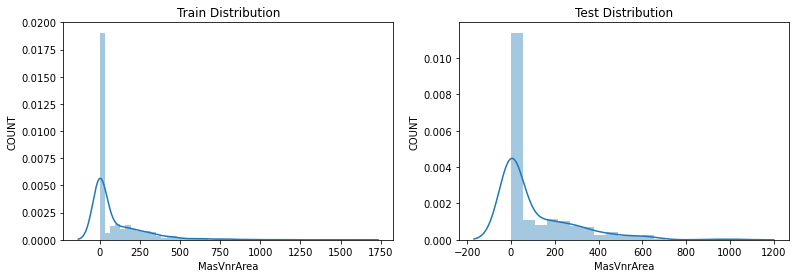

In [86]:
# MasVnrArea
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(train['MasVnrArea'])
plt.title('Train Distribution')
plt.ylabel('COUNT')

plt.subplot(1,2,2)
sns.distplot(test['MasVnrArea'])
plt.title('Test Distribution')
plt.ylabel('COUNT')
plt.show()

This column has just 8 missed records, and is float type column, lets check its distribution

Most value is zero, and since this column has just 8 missed record,we will fill all values with 0, As distribution is not like Gaussion distribution, we can't use mean to fill missing values

In [87]:
# filling with 0(zero)
train['MasVnrArea'].fillna(0.0,inplace=True)
test['MasVnrArea'].fillna(0.0,inplace=True)

In [88]:
# MasVnrType
print(train['MasVnrType'].value_counts())
print(test['MasVnrType'].value_counts())

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64
None       168
BrkFace     91
Stone       30
BrkCmn       2
Name: MasVnrType, dtype: int64


In [89]:
train['MasVnrType'].fillna('None',inplace=True)
test['MasVnrType'].fillna('None',inplace=True)

In [90]:
# Electrical
train['Electrical'].isnull().sum(), test['Electrical'].isnull().sum()

(0, 1)

We have just one missing value in test's column

In [91]:
test['Electrical'].mode()

0    SBrkr
dtype: object

In [92]:
# filling with mode
test['Electrical'].fillna('SBrkr',inplace=True)

Now, we have successfully imputed all missing values

Now I have imputed all missing values of test data as well, lets check it once.

In [93]:
# checking train data again for missed values
train.isnull().sum().sum()

0

In [94]:
test.isnull().sum().sort_values(ascending=False).nlargest(7)

Id              0
Fireplaces      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
dtype: int64

# Feature Selection

In [95]:
# checking shape of train and test dataset
train.shape, test.shape

((1168, 75), (292, 74))

In [96]:
# Selecting depending and indepent variable
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']

In [97]:
# Now we will drop this 'Id' column from both of dataset as it doesn't possess much meaning
x.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [98]:
x.shape,test.shape
# The numbers of input features(columns of x) should be sames as that of test dataset

((1168, 73), (292, 73))

In [99]:
# PREPROCESSING

In [100]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
ss=StandardScaler()

In [101]:
# selectring categorical features and level encoding
cat_train= x.select_dtypes(include='object')
cat_train.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [102]:
# Label encoding of input features
x['MSZoning']=le.fit_transform(x['MSZoning'])
x['Street']=le.fit_transform(x['Street'])
x['LotShape']=le.fit_transform(x['LotShape'])
x['LandContour']=le.fit_transform(x['LandContour'])
x['Utilities']=le.fit_transform(x['Utilities'])
x['LotConfig']=le.fit_transform(x['LotConfig'])
x['LandSlope']=le.fit_transform(x['LandSlope'])
x['Neighborhood']=le.fit_transform(x['Neighborhood'])
x['Condition1']=le.fit_transform(x['Condition1'])
x['Condition2']=le.fit_transform(x['Condition2'])
x['BldgType']=le.fit_transform(x['BldgType'])
x['HouseStyle']=le.fit_transform(x['HouseStyle'])
x['RoofStyle']=le.fit_transform(x['RoofStyle'])
x['RoofMatl']=le.fit_transform(x['RoofMatl'])
x['Exterior1st']=le.fit_transform(x['Exterior1st'])
x['Exterior2nd']=le.fit_transform(x['Exterior2nd'])
x['MasVnrType']=le.fit_transform(x['MasVnrType'])
x['ExterQual']=le.fit_transform(x['ExterQual'])
x['ExterCond']=le.fit_transform(x['ExterCond'])
x['Foundation']=le.fit_transform(x['Foundation'])
x['BsmtQual']=le.fit_transform(x['BsmtQual'])
x['BsmtCond']=le.fit_transform(x['BsmtCond'])
x['BsmtExposure']=le.fit_transform(x['BsmtExposure'])
x['BsmtFinType1']=le.fit_transform(x['BsmtFinType1'])
x['BsmtFinType2']=le.fit_transform(x['BsmtFinType2'])
x['Heating']=le.fit_transform(x['Heating'])
x['HeatingQC']=le.fit_transform(x['HeatingQC'])
x['CentralAir']=le.fit_transform(x['CentralAir'])
x['Electrical']=le.fit_transform(x['Electrical'])
x['KitchenQual']=le.fit_transform(x['KitchenQual'])
x['Functional']=le.fit_transform(x['Functional'])
x['GarageType']=le.fit_transform(x['GarageType'])
x['GarageFinish']=le.fit_transform(x['GarageFinish'])
x['GarageQual']=le.fit_transform(x['GarageQual'])
x['GarageCond']=le.fit_transform(x['GarageCond'])
x['PavedDrive']=le.fit_transform(x['PavedDrive'])
x['SaleType']=le.fit_transform(x['SaleType'])
x['SaleCondition']=le.fit_transform(x['SaleCondition'])

In [103]:
# Label encoding of Test Dataset

In [104]:
test['MSZoning']=le.fit_transform(test['MSZoning'])
test['Street']=le.fit_transform(test['Street'])
test['LotShape']=le.fit_transform(test['LotShape'])
test['LandContour']=le.fit_transform(test['LandContour'])
test['Utilities']=le.fit_transform(test['Utilities'])
test['LotConfig']=le.fit_transform(test['LotConfig'])
test['LandSlope']=le.fit_transform(test['LandSlope'])
test['Neighborhood']=le.fit_transform(test['Neighborhood'])
test['Condition1']=le.fit_transform(test['Condition1'])
test['Condition2']=le.fit_transform(test['Condition2'])
test['BldgType']=le.fit_transform(test['BldgType'])
test['HouseStyle']=le.fit_transform(test['HouseStyle'])
test['RoofStyle']=le.fit_transform(test['RoofStyle'])
test['RoofMatl']=le.fit_transform(test['RoofMatl'])
test['Exterior1st']=le.fit_transform(test['Exterior1st'])
test['Exterior2nd']=le.fit_transform(test['Exterior2nd'])
test['MasVnrType']=le.fit_transform(test['MasVnrType'])
test['ExterQual']=le.fit_transform(test['ExterQual'])
test['ExterCond']=le.fit_transform(test['ExterCond'])
test['Foundation']=le.fit_transform(test['Foundation'])
test['BsmtQual']=le.fit_transform(test['BsmtQual'])
test['BsmtCond']=le.fit_transform(test['BsmtCond'])
test['BsmtExposure']=le.fit_transform(test['BsmtExposure'])
test['BsmtFinType1']=le.fit_transform(test['BsmtFinType1'])
test['BsmtFinType2']=le.fit_transform(test['BsmtFinType2'])
test['Heating']=le.fit_transform(test['Heating'])
test['HeatingQC']=le.fit_transform(test['HeatingQC'])
test['CentralAir']=le.fit_transform(test['CentralAir'])
test['Electrical']=le.fit_transform(test['Electrical'])
test['KitchenQual']=le.fit_transform(test['KitchenQual'])
test['Functional']=le.fit_transform(test['Functional'])
test['GarageType']=le.fit_transform(test['GarageType'])
test['GarageFinish']=le.fit_transform(test['GarageFinish'])
test['GarageQual']=le.fit_transform(test['GarageQual'])
test['GarageCond']=le.fit_transform(test['GarageCond'])
test['PavedDrive']=le.fit_transform(test['PavedDrive'])
test['SaleType']=le.fit_transform(test['SaleType'])
test['SaleCondition']=le.fit_transform(test['SaleCondition'])

In [105]:
# Scaling input and test data using StandardScaler module
x=ss.fit_transform(x)
test=ss.fit_transform(x)

# Model Development

In [106]:
# Linear Regression
lr = LinearRegression()
lr.fit(x,y)
predictions = lr.predict(test)
predict = np.exp(predictions)
lr.score(x, y)

0.8356490151289271

In [107]:
# RMSE score of Linear Regression 
ypred_lr=lr.predict(test)
print('RMSE of Linear Regression: ',mse(y,ypred_lr)**1/2)

RMSE of Linear Regression:  513778348.6236443


In [108]:
# Ridge Regression
from sklearn.linear_model import Ridge
ri = Ridge(alpha=20)
ri.fit(x,y)
predictions = ri.predict(test)
predict = np.exp(predictions)
ri.score(x,y)

0.8355653574947441

In [109]:
# RMSE score of Ridge 
ypred_ri=ri.predict(test)
print('RMSE of Ridge: ',mse(y,ypred_ri)**1/2)

RMSE of Ridge:  514050338.7360278


In [110]:
# XGB Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x,y)
predictions = xgb.predict(test)
predict = np.exp(predictions)
xgb.score(x,y)

0.9998657151440404

In [111]:
# RMSE score of XGB Regressor 
ypred_xgb=xgb.predict(test)
print('RMSE of XGBRegressor: ',mse(y,ypred_xgb)**1/2)

RMSE of XGBRegressor:  419797.0369346566


In [112]:
# Random forest model
model_rf=RandomForestRegressor(n_estimators=500)
model_rf.fit(x,y)
model_rf.score(x,y)

0.9815890752901649

In [113]:
# RMSE score of Random Forest 
ypred_rf=model_rf.predict(test)
print('RMSE of Random Forest: ',mse(y,ypred_rf)**1/2)

RMSE of Random Forest:  57555646.05695385


In [114]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(criterion='mse')
model_dt.fit(x,y)
model_dt.score(x,y)

1.0

In [115]:
# RMSE score of Decision Tree
ypred_dt=model_dt.predict(test)
print('RMSE value of Decision Tree: ',mse(y,ypred_dt)**1/2)

RMSE value of Decision Tree:  0.0


In [116]:
# AdaAdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
model_adb=AdaBoostRegressor(n_estimators=300)
model_adb.fit(x,y)
model_adb.score(x,y)

0.8585026841225178

In [117]:
# RMSE score of AdaBoost Forest
ypred_adb=model_adb.predict(test)
print('RMSE of AdaBoost: ',mse(y,ypred_adb)**1/2)

RMSE of AdaBoost:  442344399.2632728


# We have found that Decision tree is the best model, with best score.